In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


def Gauss(x, A, mean, std):
  gauss = A*np.exp(-(x-mean)**2/(2*std**2))
  return gauss

In [2]:
st1 = "/Users/arathisuraj/Desktop/energy characterization of new CSPv6 26_6_2024/analog shaper/Amp66mV_1usrisetime_dig2-usb51054_CH2_20240626131137-35.txt"
st2 = "/Users/arathisuraj/Desktop/energy characterization of new CSPv6 26_6_2024/analog shaper/Amp66mV_2usrisetime_dig2-usb51054_CH2_20240626131519-37.txt"
st3 = "/Users/arathisuraj/Desktop/energy characterization of new CSPv6 26_6_2024/analog shaper/Amp66mV_3usrisetime_dig2-usb51054_CH2_20240626131914-39.txt"
st6 = "/Users/arathisuraj/Desktop/energy characterization of new CSPv6 26_6_2024/analog shaper/Amp66mV_6usrisetime_dig2-usb51054_CH2_20240626132303-42.txt"
st10 = "/Users/arathisuraj/Desktop/energy characterization of new CSPv6 26_6_2024/analog shaper/Amp66mV_10usrisetime_dig2-usb51054_CH2_20240626132805-46.txt"

st1_old = "/Users/arathisuraj/Desktop/energy characterization of new CSPv6 26_6_2024/old csp + analog shaper/Amp66mV_1usrisetime__dig2-usb51054_CH2_20240626145412-23.txt"
st2_old = "/Users/arathisuraj/Desktop/energy characterization of new CSPv6 26_6_2024/old csp + analog shaper/Amp66mV_2usrisetime__dig2-usb51054_CH2_20240626145131-21.txt"
st3_old = "/Users/arathisuraj/Desktop/energy characterization of new CSPv6 26_6_2024/old csp + analog shaper/Amp66mV_3usrisetime__dig2-usb51054_CH2_20240626144806-18.txt"
st6_old = "/Users/arathisuraj/Desktop/energy characterization of new CSPv6 26_6_2024/old csp + analog shaper/Amp66mV_6usrisetime__dig2-usb51054_CH2_20240626144358-14.txt"
st10_old = "/Users/arathisuraj/Desktop/energy characterization of new CSPv6 26_6_2024/old csp + analog shaper/Amp66mV_10usrisetime__dig2-usb51054_CH2_20240626143933-11.txt"

In [3]:
filenames = [st1_old, st2_old, st3_old, st6_old, st10_old]
lengths = []

for name in filenames:
    file = open(name, "r")
    length = len(file.readlines())
    lengths.append(length)
    file.close()

165


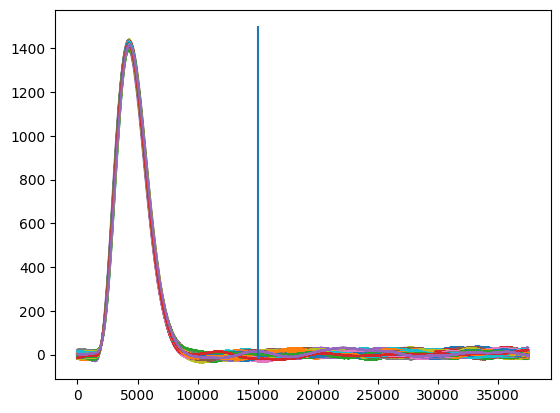

68.293


In [4]:
# Making peak noise histograms and extracting the FWHM to use in the plot
ind = 4
peaks = []
noise_list = []
for num in range(1, lengths[ind]):
    if num % 5 == 0:
        data = np.loadtxt(filenames[ind], skiprows=num-1, max_rows=1)
        noise = data[15000:]
        peak = max(data)
        peaks.append(peak)
        noise_list.append(noise)

        plt.plot(data)
    else:
        pass

peaks = np.array(peaks)
print(len(peaks))
plt.vlines(15000, -20, 1500)
plt.show()

noise_array = np.array(noise_list)
print(max(noise_array.flatten()) - min(noise_array.flatten()))

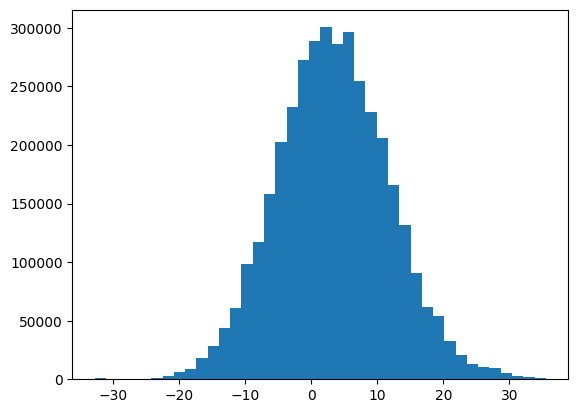

In [5]:
bin_num = 40
n, b, p = plt.hist(noise_array.flatten(), bins=bin_num, align="mid")

In [6]:
popt, pcov = curve_fit(Gauss, b[0:len(n)], n, p0=[300000, 3, 10])
print(popt)

[3.00861060e+05 2.28388669e+00 8.39093313e+00]


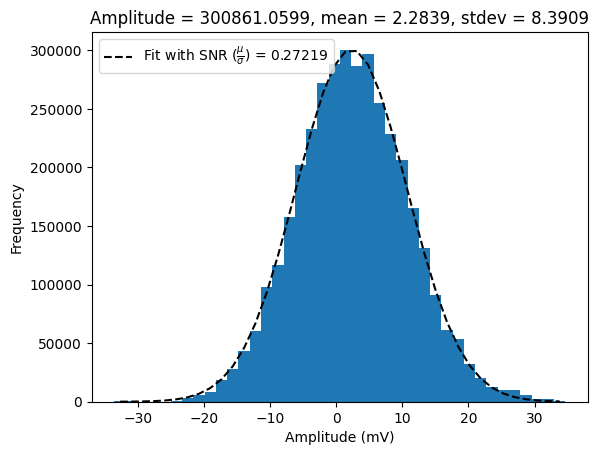

In [7]:
plt.plot(b[0:len(n)], Gauss(b[0:len(n)], *popt), "--", color="black", label=r"Fit with SNR ($\frac{\mu}{\sigma}$) = %.05f" % (popt[1]/popt[2]))
n2, b2, p2 = plt.hist(noise_array.flatten(), bins=b, align="left")
plt.title("Amplitude = %.04f, mean = %.04f, stdev = %.04f" % (popt[0], popt[1], popt[2]))
plt.xlabel("Amplitude (mV)")
plt.ylabel("Frequency")
plt.legend()
plt.show()

In [10]:
# Conversion
amp = 66e-3
C_inj = 1e-12
energy_of_sq = C_inj * amp * (1/12) * 25/(1.6e-19) * 1e-6
conv_factor = energy_of_sq/np.mean(peaks)

print(popt[2]*2.35*conv_factor*1e3)

11.95814494423982


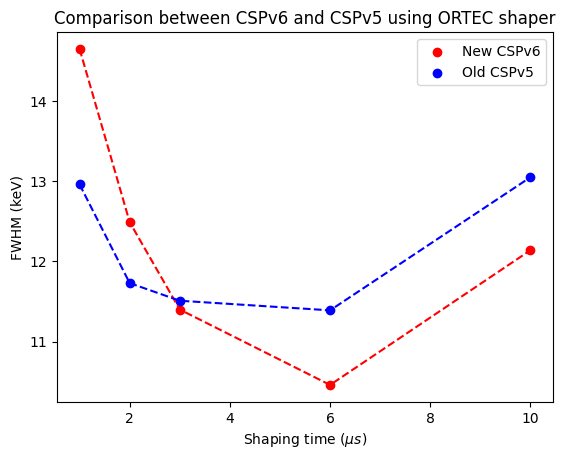

In [107]:
FWHM_array_6 = [14.65, 12.49, 11.40, 10.46, 12.14]
time_array_6 = [1, 2, 3, 6, 10]
FWHM_array_5 = [12.96, 11.73, 11.51, 11.39, 13.05]
time_array_5 = [1, 2, 3, 6, 10]
plt.plot(time_array_6, FWHM_array_6, ls="--", color="red")
plt.scatter(time_array_6, FWHM_array_6, color="red", label="New CSPv6")
plt.plot(time_array_5, FWHM_array_5, ls="--", color="blue")
plt.scatter(time_array_5, FWHM_array_5, color="blue", label="Old CSPv5")
plt.xlabel(r"Shaping time ($\mu s$)")
plt.ylabel("FWHM (keV)")
plt.title("Comparison between CSPv6 and CSPv5 using ORTEC shaper")
#plt.hlines(15, 0, 10, color="black", alpha=0.5, ls="--", label="15 keV")
plt.legend()

In [108]:
# Visualizing baseline noise

st10 = "/Users/arathisuraj/Desktop/energy characterization of new CSPv6 26_6_2024/analog shaper/Amp66mV_10usrisetime_dig2-usb51054_CH2_20240626132805-46.txt"

st10_old = "/Users/arathisuraj/Desktop/energy characterization of new CSPv6 26_6_2024/old csp + analog shaper/Amp66mV_10usrisetime__dig2-usb51054_CH2_20240626143933-11.txt"

In [109]:
filenames = [st10, st10_old]
lengths = []

for name in filenames:
    file = open(name, "r")
    length = len(file.readlines())
    lengths.append(length)
    file.close()

165


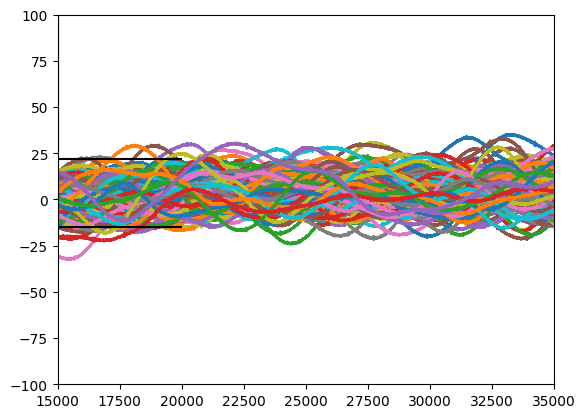

68.293


In [121]:
ind = 1
peaks = []
noise_list = []
for num in range(1, lengths[ind]):
    if num % 5 == 0:
        data = np.loadtxt(filenames[ind], skiprows=num-1, max_rows=1)
        noise = data[15000:]
        peak = max(data)
        peaks.append(peak)
        noise_list.append(noise)

        plt.plot(data)
    else:
        pass

peaks = np.array(peaks)
print(len(peaks))
plt.vlines(15000, -20, 1500)
plt.xlim(15000, 35000)
plt.ylim(-100, 100)
factor = 20
plt.hlines(-35+factor, 15000, 20000, color="black")
plt.hlines(2+factor, 15000, 20000, color="black")
plt.show()

noise_array = np.array(noise_list)
print(max(noise_array.flatten()) - min(noise_array.flatten()))